# Exercise 04: Bolometer
\- Gugliemo Grillo

<div><table>
  <tr>
    <td><img src="https://i.ibb.co/q1N6yCG/Bolometer2020-Text-1.png"></td>
    <td><img src="https://i.ibb.co/J37CFwp/Bolometer2020-Text-2.png"/></td>
  </tr>
  <tr>
    <td><img src="https://i.ibb.co/bdfm4xy/Bolometer2020-Text-3.png"/></td>
    <td><img src="https://i.ibb.co/GV0T8Bs/Bolometer2020-Text-4.png"/></td>
  </tr>    
  <tr>
    <td><img src="https://i.ibb.co/XZbbwwJ/Bolometer2020-Text-5.png"/></td>
    <td><img src="https://i.ibb.co/NV9m0d3/Bolometer2020-Text-6.png"/></td>
  </tr>
</table></div>

In [10]:
# packages used
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Math

# Given constans
R0 = 1 #Ohm
T0 = 10e-3 #K
C0 = 150e-12 # J/K
KAPPA = 10e-9 # W/K
RHO = 2e3 #Ohm/K
I0 = 1e-6 #A
Rfb = 100 #Ohm
Vbias = 50e-6 #V

### Equilibrium Value
Let's start by writing the thermodynamical equation for the system both in terms of heat and voltages:
$$ C_0 \frac{T^3}{T_0^3} \frac{d \delta T}{dt} = W_e - W_{sink} + W_{fb} $$

$$ C_o \frac{(T+\delta T)^3}{T_0} \frac{d \delta T}{dt} = W_e - k\delta T + \frac{[V_{bias}-(V-V_{ref})]^2}{R_{fb}}$$

The second one, by substituting the relation $V(T) = I_0 \rho (T-T_0) + I_0 R(T_0)$ and neglecting terms of order higher than linear, becomes:
$$ C_o \bigl( 3\frac{\delta T}{T_0}+1\bigr) \frac{d \delta T}{dt} + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T= W_e + \frac{V_{bias}^2}{R_{fb}}$$

It's then possible to evaluate $\Delta T$ by imposing $W_e=0$ and noting that at equilibrium $\frac{d \delta T}{dt}=0$. Thus we have:
$$ \Delta T = \frac{V_{bias}^2}{R_{fb}}\bigl[ k + 2\frac{V_{bias}}{R_{fb}}\rho I_o \bigr]^{-1}$$

In [11]:
DeltaT = Vbias**2/Rfb / (KAPPA+2*Vbias*RHO*I0/Rfb)
display(Math(r'T_e-T_0=\Delta T = {:.5e} K'.format(DeltaT)))

<IPython.core.display.Math object>

which isn't a lot smaller than the thermostat temperature of $T_0 = 10 mK$, but for simplicity I'm going to assume that it's small enough.

### Amplifier's voltage output at equilibrium

The quantity desired is obtained through:
$$ V_e = V(T_0 + \Delta T) - V_{ref} = \rho (T_0 + \Delta T)I_0 - \rho T_0 I_0 = \rho I_0 \Delta T$$

In [12]:
Ve = RHO*I0*(DeltaT)
display(Math(r'V_e = {:.5e} V'.format(Ve)))

<IPython.core.display.Math object>

### Feedback heat at equilibrium
The heat generated through the feedback loop can be written as:
$$W_{fbe} = \frac{[V_{bias}-(V-V_{ref})]^2}{R_{fb}} = \frac{V_{bias}^2 - 2 \rho \Delta T I_0 V_{bias} + (\rho I_0 \Delta T)^2}{R_{fb}} \simeq \frac{V_{bias}^2 - 2 \rho \Delta T I_0 V_{bias}}{R_{fb}}$$
where we discarded the term depending on $\Delta T^2$.

In [13]:
Wfbe = (Vbias**2 - 2*RHO*DeltaT*I0*Vbias)/Rfb
display(Math(r'W_{fbe} ='+' {:.5e} W'.format(Wfbe)))

<IPython.core.display.Math object>

### Impulse and frequency response
In order to evaluate both the impulse and the frequency response we assume the term $\frac{\delta T}{T_0}<<1$ and simplify the differential equation to:
$$ C_o \frac{d \delta T(t)}{dt} + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T(t)= W_e(t) + \frac{V_{bias}^2}{R_{fb}}$$

#### Case 1: $W_e \rightarrow \delta T' = \delta T - \Delta T$ 
If we perform the desired change of variable the equation becomes:
$$ C_o \frac{d \delta T'(t)}{dt'} + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T'(t) + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \Delta T= W_e(t) + \frac{V_{bias}^2}{R_{fb}}$$
$$\Rightarrow C_o \frac{d \delta T'(t)}{dt} + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T'(t) = W_e(t)$$
where we make use of the relation (4). Performing a Fourier transform we get:

$$C_o i\omega \delta T'(\omega) + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T'(\omega) = W_e(\omega)$$


$$\textrm{[Frequency response]       }  h(\omega)=\frac{\delta T'(\omega)}{W_e(\omega)} = \frac{1/C_0}{i \omega + \frac{k}{C_0} + 2\frac{V_{bias}}{R_{fb}C_0} }  $$

$$\textrm{[Impulse response]       }  h(t)=\frac{\delta T'(t)}{W_e(t)} = \frac{1}{2\pi C_0}e^{-\bigl( \frac{k}{C_0} + 2\frac{V_{bias}}{R_{fb}C_0}\bigr)t} \theta(t)$$

#### Case 2: $W_e \rightarrow \delta V = V - V_{ref} - V_e$ 
We could substitute and redo all the calculation. Instead we note that: $$\delta V(t) = I_0 \rho (\delta T'(t) + \Delta T)- I_0 \rho (T_0 + \Delta T - T_0) = I_0 \rho\ \delta T'(t)$$

$$\rightarrow \delta V(\omega) = I_0 \rho\ \delta T'(\omega)$$

We can then perform the substitution in the Fourier space and get:
$$\textrm{[Frequency response]       }  h(\omega)=\frac{\delta V(\omega)}{W_e(\omega)} = \frac{I_0 \rho/C_0}{i \omega + \frac{k}{C_0} + 2\frac{V_{bias}}{R_{fb}C_0} }  $$

$$\textrm{[Impulse response]       }  h(t)=\frac{\delta V(t)}{W_e(t)} = \frac{I_0 \rho}{2\pi C_0}e^{-\bigl( \frac{k}{C_0} + 2\frac{V_{bias}}{R_{fb}C_0}\bigr)t} \theta(t)$$

The plots for the impulse and frequency response are:

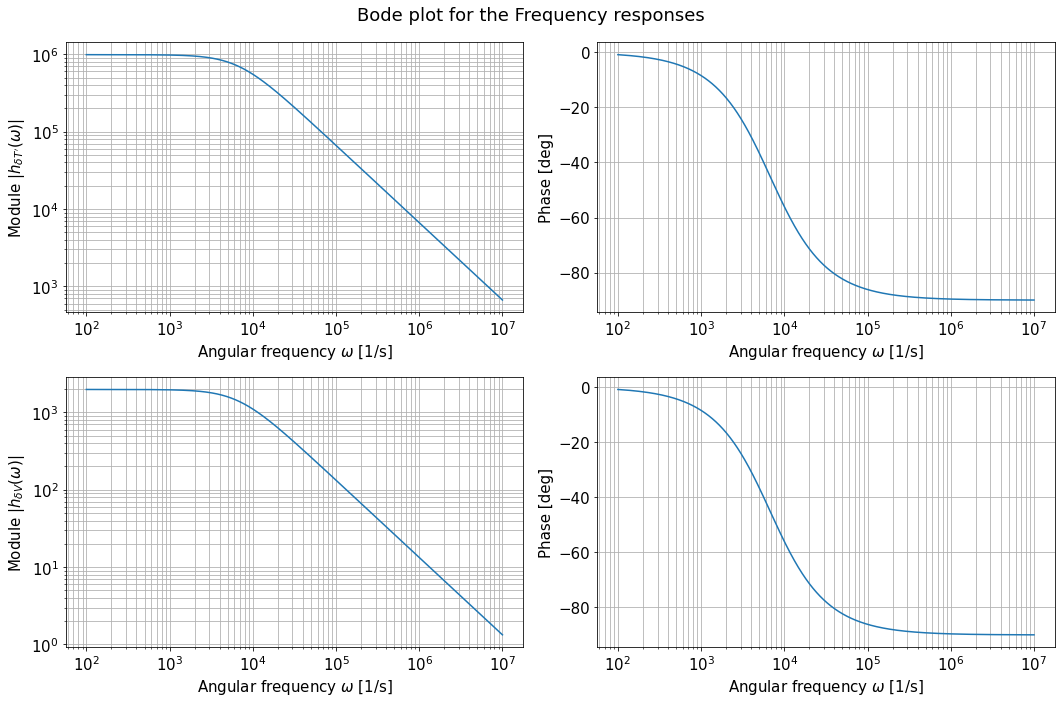

In [14]:
def h_T(omega):
    return 1/(1j*omega*C0 + KAPPA + 2*Vbias/Rfb)

def h_V(omega):
    return I0*RHO/(1j*omega*C0 + KAPPA + 2*Vbias/Rfb)

w = np.linspace(int(1e2), int(1e7), int(1e6))

points_h_T = h_T(w)
mag = np.abs(points_h_T)
phase = np.arctan(np.imag(points_h_T) / np.real(points_h_T))*180/np.pi

# Bode plot
plt.rcParams.update({'font.size': 15})
fig, axis = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('Bode plot for the Frequency responses')

axis[0][0].plot(w, mag)
axis[0][0].set_xscale('log')
axis[0][0].set_yscale('log')
axis[0][0].set_xlabel("Angular frequency $\omega$ [1/s]")
axis[0][0].set_ylabel("Module |$h_{\delta T'}(\omega$)|")
axis[0][0].grid(True, which="both")

axis[0][1].plot(w, phase)
axis[0][1].set_xscale('log')
axis[0][1].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[0][1].set_ylabel(r"Phase [deg]")
axis[0][1].grid(True, which="both")


points_h_V = h_V(w)
mag = np.abs(points_h_V)
phase = np.arctan(np.imag(points_h_V) / np.real(points_h_V))*180/np.pi

axis[1][0].plot(w, mag)
axis[1][0].set_xscale('log')
axis[1][0].set_yscale('log')
axis[1][0].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[1][0].set_ylabel(r"Module |$h_{\delta V}(\omega$)|")
axis[1][0].grid(True, which="both")

axis[1][1].plot(w, phase)
axis[1][1].set_xscale('log')
axis[1][1].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[1][1].set_ylabel(r"Phase [deg]")
axis[1][1].grid(True, which="both")



plt.tight_layout()
plt.show()

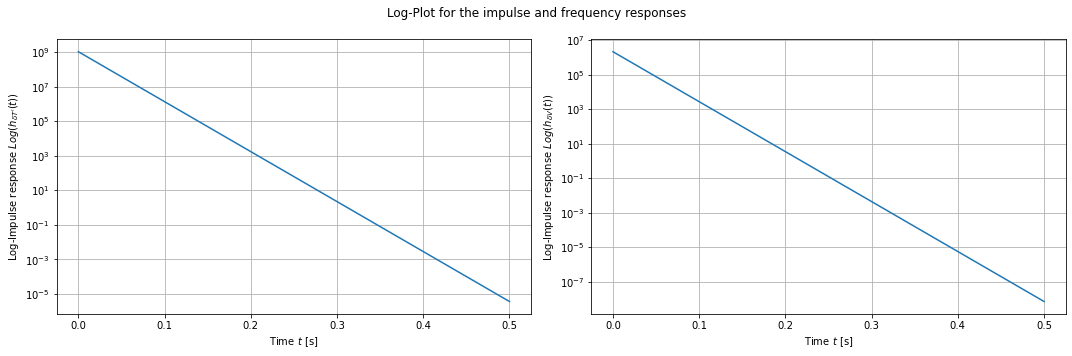

In [15]:
def h_T(t):
    return np.exp(-(KAPPA/C0 + 2*Vbias/Rfb)*t)/(2*np.pi*C0)

def h_V(t):
    return I0*RHO/(2*np.pi*C0)*np.exp(-(KAPPA/C0 + 2*Vbias/Rfb)*t)

t = np.linspace(0, 0.5, int(1e6))

# Bode plot
plt.rcParams.update({'font.size': 10})
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Log-Plot for the impulse and frequency responses')

axis[0].plot(t, h_T(t=t))
axis[0].set_yscale('log')
axis[0].set_xlabel("Time $t$ [s]")
axis[0].set_ylabel("Log-Impulse response $Log(h_{\delta T'}(t))$")
axis[0].grid(True, which="both")


axis[1].plot(t, h_V(t=t))
axis[1].set_yscale('log')
axis[1].set_xlabel("Time $t$ [s]")
axis[1].set_ylabel("Log-Impulse response $Log(h_{\delta V}(t))$")
axis[1].grid(True, which="both")


plt.tight_layout()
plt.show()

### Null $V_{bias}$
If $V_{bias}=0$ the answer follow from the previous answers:
#### Case 1: $W_e \rightarrow \delta T' = \delta T - \Delta T$ 
$$h(\omega)=\frac{\delta T'(\omega)}{W_e(\omega)} = \frac{1/C_0}{i \omega + \frac{k}{C_0}}  $$

$$h(t)=\frac{\delta T'(t)}{W_e(t)} = \frac{1}{2\pi C_0}e^{-\frac{k}{C_0}t} \theta(t)$$

#### Case 2: $W_e \rightarrow \delta V = V - V_{ref} - V_e$ 
$$h(\omega)=\frac{\delta V(\omega)}{W_e(\omega)} = \frac{I_0 \rho/C_0}{i \omega + \frac{k}{C_0}}  $$

$$h(t)=\frac{\delta V(t)}{W_e(t)} = \frac{I_0 \rho}{2\pi C_0}e^{-\frac{k}{C_0}t} \theta(t)$$

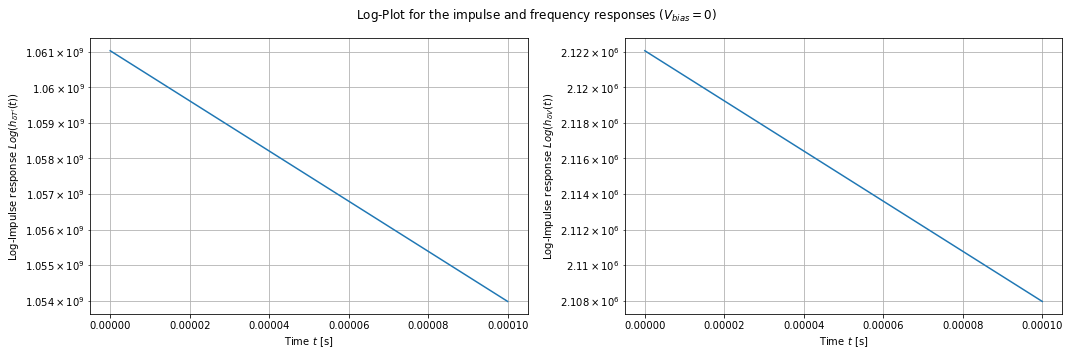

In [16]:
def h_T(t):
    return np.exp(-(KAPPA/C0)*t)/(2*np.pi*C0)

def h_V(t):
    return I0*RHO/(2*np.pi*C0)*np.exp(-(KAPPA/C0)*t)

t = np.linspace(0, 1e-4, int(1e6))

# Bode plot
plt.rcParams.update({'font.size': 10})
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Log-Plot for the impulse and frequency responses ($V_{bias}=0$)')

axis[0].plot(t, h_T(t=t))
axis[0].set_yscale('log')
axis[0].set_xlabel("Time $t$ [s]")
axis[0].set_ylabel("Log-Impulse response $Log(h_{\delta T'}(t))$")
axis[0].grid(True, which="both")


axis[1].plot(t, h_V(t=t))
axis[1].set_yscale('log')
axis[1].set_xlabel("Time $t$ [s]")
axis[1].set_ylabel("Log-Impulse response $Log(h_{\delta V}(t))$")
axis[1].grid(True, which="both")


plt.tight_layout()
plt.show()

#### Case: $W_e \rightarrow \delta W_{fb} = W_{fb} - W_{fbe}$
To start, let's write the relation between $\delta T$ and $\delta W_{fb}$:

$$\delta W_{fb} = W_{fb} - W_{fbe} = \frac{[V_{bias}-(V-V_{ref})]^2}{R_{fb}} - \frac{V_{bias}^2 - 2\rho \Delta T I_o V_{bias}+(\rho I_0 \Delta T)}{R_{fb}} = \frac{-2 V_{bias}\rho I_0 (\delta T - \Delta T) + \rho^2 I_0^2 (\delta T^2 - \Delta T^2)}{R_{fb}}$$

$$\delta W_{fb} = \frac{-2 V_{bias}\rho I_0}{R_{fb}}\delta T + \frac{2 V_{bias}\rho I_0}{R_{fb}} \Delta T + \mathcal{O}\bigl[(\delta T^2 - \Delta T^2)\bigr]$$

$$\rightarrow  \delta T = -\frac{R_{fb}}{2\rho V_{bias} I_0}\ \delta W_{fb} + \Delta T$$


Where in (22) the $\mathcal{O}\bigl[(\delta T^2 - \Delta T^2)\bigr]$ term was neglected. This is done because $\mathcal{O}\bigl[(\delta T^2 - \Delta T^2)\bigr] = \mathcal{O}\bigl[(T_0^2 - T_e^2 + 2T\ \Delta T)\bigr]$ is negligible. An esteem for the error at equilibrium is provided before the plot.

The differential equation then becomes:

$$ - \frac{C_0 R_{fb}}{2 V_{bias} \rho I_0} \frac{d\ \delta W_{fb}(t)}{dt} - \bigl( k+2 \frac{V_{bias}}{R_{fb}\rho I_0}  \bigr) \frac{R_{fb}}{2 V_{bias \rho I_0}}\ \delta W_{fb} = W_e(t) + \bigl[ \frac{V_{bias}^2}{R_{fb}}-\bigl( k+2 \frac{V_{bias}}{R_{fb}\rho I_0}  \bigr)\ \Delta T \bigr]$$

Where the term between square brackets on the right is zero due to (4). The equation can be rewritten as:

$$\frac{d\ \delta W_{fb}(t)}{dt} + \bigl( \frac{k}{C_0}+2 \frac{V_{bias}\rho I_0}{C_0 R_{fb}}  \bigr) \ \delta W_{fb}(t) = - \frac{2 V_{bias} \rho I_0}{C_0 R_{fb}}W_e(t)$$

Defining $\tau = \frac{2 V_{bias} \rho I_0}{C_0 R_{fb}}$ and $\delta W_{fb} \rightarrow -\delta W_{fb}$:

$$\frac{d\ \delta W_{fb}(t)}{dt} + \bigl( \frac{k}{C_0}+\tau  \bigr) \ \delta W_{fb}(t) = \tau  W_e(t)$$

$$i \omega\ \delta W_{fb}(\omega) + \bigl( \frac{k}{C_0}+\tau  \bigr) \ \delta W_{fb}(\omega) = \tau  W_e(\omega)$$

The frequency and impulse responses are then:

$$h_{\delta W_{fb}}(\omega)=\frac{W_{fb}(\omega)}{W_e(\omega)} = \frac{\tau}{i \omega + (\frac{k}{C_0}+\tau)} $$

$$h_{\delta W_{fb}}(t)=\frac{W_{fb}(t)}{W_e(t)} = \frac{\tau}{2\pi} \theta(t) e^{-(\frac{k}{C_0}+\tau)t} $$

In [17]:
Te = T0 + DeltaT
error = lambda T: (RHO**2 * I0**2 /Rfb)*(T0**2 - Te**2 + 2*T*DeltaT)

display(Math(r'error({:.5e})\simeq{:.5e} W'.format(Te, error(Te))))

<IPython.core.display.Math object>

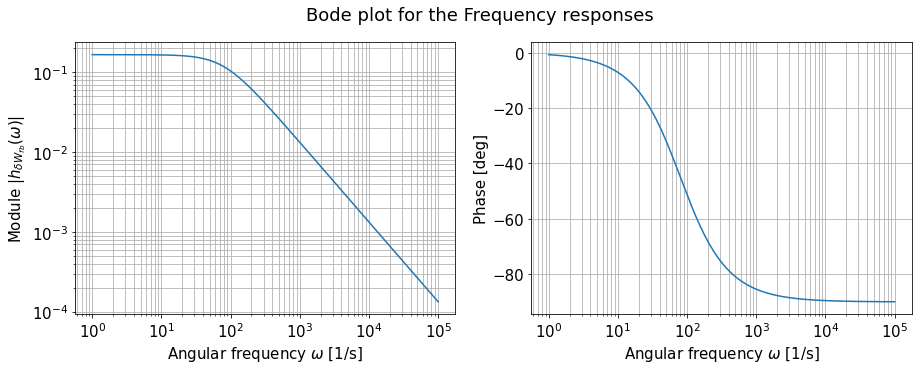

In [18]:
tau = 2*Vbias*RHO*I0 /(C0*Rfb)

def h_W(omega):
    return -1*tau / (1j*omega+(KAPPA/C0 + tau) )

w = np.linspace(int(1e0), int(1e5), int(1e6))

points = h_W(w)
mag = np.abs(points)
phase = np.arctan(np.imag(points) / np.real(points))*180/np.pi

# Bode plot
plt.rcParams.update({'font.size': 15})
fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Bode plot for the Frequency responses')

axis[0].plot(w, mag)
axis[0].set_xscale('log')
axis[0].set_yscale('log')
axis[0].set_xlabel("Angular frequency $\omega$ [1/s]")
axis[0].set_ylabel("Module |$h_{\delta W_{fb}}(\omega$)|")
axis[0].grid(True, which="both")

axis[1].plot(w, phase)
axis[1].set_xscale('log')
axis[1].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[1].set_ylabel(r"Phase [deg]")
axis[1].grid(True, which="both")

### Maximum value for $|W_0|$
In order to answer to the last problem, let's rewrite equation (8) with the given values:
$$C_o \frac{d \delta T'(t)}{dt} + \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T'(t) = W_0 sin(2\pi f t)$$

Now we perform some simplification assuming that:
\begin{enumerate}
    \item We are only interested in the behaviour near the maxima
    \item The relation between $\delta T'(t)$ and $W_e(t)$ is linear (this can be assumed because we are in linear regime)
\end{enumerate}
With these hypothesis the maxima of $W_e(t)$ correspond to the maxima of $\delta T'(t)$ and it's derivative with respect to the time is zero. The expression can then be simplified to:

$$\bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) \delta T'(t) = W_0 \rightarrow  \delta T'(t) = W_0 \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr)^{-1} \leq 1 \mu K$$ 

And the maximum value for $W_0$ is:

$$ W_0 = \bigl(k + 2\frac{V_{bias}}{R_{fb}}\rho I_o\bigr) * 1 \mu K$$

In [19]:
W0 = KAPPA + 2* Vbias*RHO*I0 / Rfb
display(Math(r'|W_{0}| ='+' {:.5e} W'.format(W0)))

<IPython.core.display.Math object>